# Apprentissage automatique Devoir partie 1  


## Scikit-learn et la classification

Ce script s'est appuyé principalement sur l'exploration de classifieur `LogisticRegression` qui est utilisé largement beaucoup à traiter la classification des étiquettes binaires. Dans un premier lieu, on a construit le dataset et implémenté le model, dans un second lieu, on a essayé de trouver les paramètres les plus adaptés et évalué la performance de ce modèle parmi les autres. 

### Download the dataset

In [1]:
import os 
os.getcwd()

'c:\\LI\\apprentissage\\projets_appre_he_huang\\projets_appre_he_huang\\projets_appre_he_huang\\imdb'

In [2]:
!curl -o imdb_smol.tar.gz -L https://github.com/LoicGrobol/apprentissage-artificiel/raw/main/slides/06-scikit-learn/data/imdb_smol.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  329k  100  329k    0     0   205k      0  0:00:01  0:00:01 --:--:--  321k
100  329k  100  329k    0     0   205k      0  0:00:01  0:00:01 --:--:--  321k


In [3]:
!tar -xf imdb_smol.tar.gz

### Writing a csv file

In [4]:
PATH = ".\\imdb_smol"

In [5]:
import os
import re

def index_files(PATH):
    """
    :return -> dict {'neg': ['0_3.txt', '100_3.txt', '101_1.txt'...], 'pos': ['0_9.txt', '100_7.txt', '101_8.txt'...]

    """
    filedict = {}
    
    for root, dir, fs in os.walk(PATH):
        for d in dir:
            filepath = os.listdir(PATH + "\\" + d)
            filedict[d] = filepath 
    return filedict 

In [6]:
def get_corpus(PATH, filedict):

    """
    :return -> liste de corpus ["OK its not the best film I've ever seen but at the same time...",...]
    """
    idx = []
    content = []

    for label, txt in filedict.items():
        for t in txt:
            with open(PATH + "\\" + label + "\\" + t, "r", encoding='utf-8') as input:
                text = input.read()
            content.append(text)
            idx.append(label)
    return content

In [7]:
def file_to_opinion(filedict):

    """
    :return -> dict {'0_3': 'neg',...,'0_9': 'pos'...}
    """
    file_map_opinion = {}

    for classe, texte in filedict.items():
        for doc in texte: 
            docid = doc.split(".")[0]
            file_map_opinion[docid] = classe
    return file_map_opinion

filedict = index_files(PATH)

In [8]:
import csv

def make_csv(PATH, file_map_opinion, content):
    """
    :return -> csvfile  
    """
    title = ["docid", "text", "label"]
    with open(PATH + "\\"+ "csv_file.csv", "w", newline='') as output:
        writer = csv.writer(output)
        writer.writerow(title)
        
        for (key,val), txt in zip(file_map_opinion.items(), content):
            writer.writerow([key, txt, val])
            
file_map_opinion = file_to_opinion(filedict)            
content = get_corpus(PATH, filedict)
make_csv(PATH, file_map_opinion, content)

### Read data in dataframe

In [9]:
import pandas as pd
imdb = pd.read_csv(PATH + "\\" + "csv_file.csv")
imdb.head(10)

,docid,text,label
0,0_3,Story of a man who has unnatural feelings for ...,neg
1,100_3,OK its not the best film I've ever seen but at...,neg
2,101_1,"Amateur, no budget films can be surprisingly g...",neg
3,102_1,My girlfriend once brought around The Zombie C...,neg
4,103_1,"Without wishing to be a killjoy, Brad Sykes is...",neg
5,104_3,En route to a small town that lays way off the...,neg
6,105_2,There's tons of good-looking women in this fli...,neg
7,106_2,1st watched 8/3/2003 - 2 out of 10(Dir-Brad Sy...,neg
8,107_2,"If the crew behind ""Zombie Chronicles"" ever re...",neg
9,108_1,Pros: Nothing<br /><br />Cons: Everything<br /...,neg


#### Find the number and the proportion of negative and positive reviews 

In [10]:
print(f"Nombre de positive and négative critique:\n{imdb.label.value_counts()}")

Nombre de positive and négative critique:
neg    301
pos    301
Name: label, dtype: int64


In [11]:
print(f"Proportion de positive et negative critique:\n{imdb.label.value_counts() / len(imdb)}")

Proportion de positive et negative critique:
neg    0.5
pos    0.5
Name: label, dtype: float64


#### Convert the opinion string "neg" or "pos" to 0 or 1

In [12]:
def convert(x):
    """
    :return -> "neg" : 0, "pos" : 1
    """

    if x == 'neg':
        return 0
    else:
        return 1

In [13]:
values = imdb['label'].apply(lambda x : convert(x))
imdb['label'] = values

In [14]:
imdb[['docid', 'label']]

,docid,label
0,0_3,0
1,100_3,0
2,101_1,0
3,102_1,0
4,103_1,0
...,...,...
597,96_10,1
598,97_9,1
599,98_10,1
600,99_8,1


#### Find the longest review and the shortest review

In [15]:
length_critique = imdb.text.str.len()

print(f"The longest review: \n{max(length_critique)}")
print(f"The shortest review: \n{min(length_critique)}")

The longest review: 
6037
The shortest review: 
65


### Bag-of-words : BOW representation and Tfidf on sentiment data 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'

vect1 = CountVectorizer(
    max_features=200, 
    ngram_range=(1,1), 
    max_df=100,
    token_pattern=my_pattern, 
    stop_words=ENGLISH_STOP_WORDS)

vect2 = TfidfVectorizer(
    max_features=200, 
    ngram_range=(1,1), 
    max_df=100, 
    token_pattern=my_pattern, 
    stop_words=ENGLISH_STOP_WORDS)

vect1.fit(imdb.text)
vect2.fit(imdb.text)

X_text1 = vect1.transform(imdb.text)
X_text2 = vect2.transform(imdb.text)

X_df1 = pd.DataFrame(X_text1.toarray(), columns=vect1.get_feature_names_out())
X_df2 = pd.DataFrame(X_text2.toarray(), columns=vect2.get_feature_names_out())

In [17]:
print(f"5 premiers rangs en utilisant BOW: \n {X_df1.head()}")
print()
print(f"5 premiers rangs en utilisant Tfidf: \n {X_df2.head()}")

5 premiers rangs en utilisant BOW: 
    action  actor  actors  actress  actually  american  audience  away  awful  \
0       0      0       0        0         0         0         1     0      0   
1       0      0       0        0         0         0         0     0      2   
2       0      1       0        0         0         0         0     0      0   
3       0      0       0        0         0         1         0     0      0   
4       0      0       0        0         0         0         0     0      0   

   beautiful  ...  woman  women  won  wonderful  world  worst  worth  year  \
0          0  ...      0      0    0          0      0      0      0     0   
1          0  ...      0      0    0          0      0      0      0     0   
2          0  ...      0      0    0          0      0      1      0     0   
3          0  ...      0      0    0          0      0      1      0     0   
4          0  ...      0      0    0          0      0      0      0     0   

   years  you

In [18]:
# Convert the features and targets to a NumPy array
X = X_df2.to_numpy() # The text has been transformed, using Tfidf, to numeric columns
print(f"Le corpus a {X.shape[0]} lignes et {X.shape[1]} colonnes")
print("Et voici un échantillon :")
sample = X_text2[:5, :10].todense()
print(sample)

print()
y = imdb["label"].to_numpy()
print(f"La classe a {y.shape[0]} lignes")

Le corpus a 602 lignes et 200 colonnes
Et voici un échantillon :
[[0.         0.         0.         0.         0.         0.
  0.49089661 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.56727689 0.        ]
 [0.         0.20069388 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.25927677
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]

La classe a 602 lignes


### Binary Classification Model

In [19]:
# Split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60, stratify=y)

In [20]:
# Train a logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train, y_train)

#### Model metrics

In [21]:
from sklearn.metrics import accuracy_score

y_predicted = log_reg.predict(X_test) 

print('Score de précision sur les données de train: ', log_reg.score(X_train, y_train))
print('Score de précision sur les données de test: ', accuracy_score(y_test, y_predicted))

Score de précision sur les données de train:  0.8794178794178794
Score de précision sur les données de test:  0.743801652892562


In [22]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_predicted, squared=False)

0.5061603966209111

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted)/len(y_test))

[[0.3553719  0.14049587]
 [0.11570248 0.38842975]]


In [23]:
# Predict probability 
y_proba = log_reg.predict_proba(X_test)
print(f"Les premières 10 probabilités prédictes : \n\n{y_proba[:10]}")

Les premières 10 probabilités prédictes : 

[[0.37654419 0.62345581]
 [0.68972979 0.31027021]
 [0.48996004 0.51003996]
 [0.4848762  0.5151238 ]
 [0.66968655 0.33031345]
 [0.1195592  0.8804408 ]
 [0.747223   0.252777  ]
 [0.42517459 0.57482541]
 [0.25735499 0.74264501]
 [0.37617887 0.62382113]]


#### Plot the ROC curve

In [24]:
from matplotlib import pyplot as plt

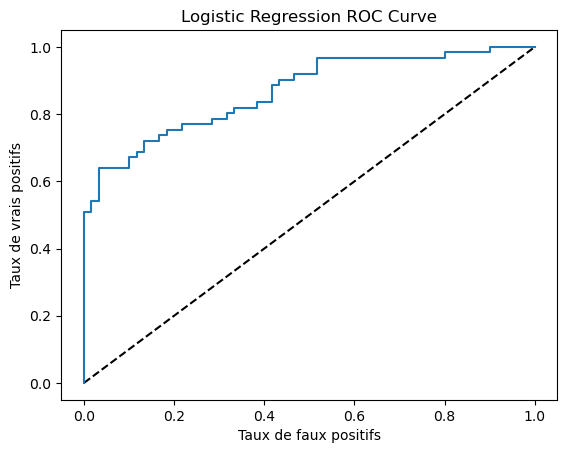

In [25]:
from sklearn.metrics import roc_curve 
fp, tp, thresholds = roc_curve(y_test, y_proba[:,1])
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fp, tp) 
plt.xlabel('Taux de faux positifs') 
plt.ylabel('Taux de vrais positifs') 
plt.title('Logistic Regression ROC Curve')
plt.show()

#### Cross-validation

In [26]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=60) 
log_reg = LogisticRegression()
cv_results = cross_val_score(log_reg, X, y, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))

[0.7768595  0.71900826 0.70833333 0.775      0.75      ]
0.745840220385675 0.028130101004969106


#### Regularized logistic regression

In [27]:
weak_reg = LogisticRegression(C=100)
strong_reg = LogisticRegression(C=0.01)

weak_reg.fit(X_train, y_train)
strong_reg.fit(X_train, y_train)

reg1_train = weak_reg.score(X_train, y_train)
reg2_train = strong_reg.score(X_train, y_train)
print(f"plus de régularisation : précision d'apprentissage plus faible :\n weak: {reg1_train}, strong: {reg2_train}")
print()
reg1_test = weak_reg.score(X_test, y_test)
reg2_test = strong_reg.score(X_test, y_test)
print(f"plus de régularisation : une meilleure précision du test :\n weak:{reg1_test}, strong: {reg2_test}")

plus de régularisation : précision d'apprentissage plus faible :
 weak: 0.9771309771309772, strong: 0.8336798336798337

plus de régularisation : une meilleure précision du test :
 weak:0.6942148760330579, strong: 0.8099173553719008


#### L1 L2 Regularization 
> Un coefficient élevé peut conduire à un ajustement excessif `overfitting`  
> L2 -> réduit tous les coefficients vers zéro  
> Régularisation : Pénaliser les coefficients élevés

In [28]:
log_L1 = LogisticRegression(penalty='l1', solver='liblinear')
log_L2 = LogisticRegression(penalty='l2') 

log_L1.fit(X_train, y_train) 
log_L2.fit(X_train, y_train)

LogisticRegression()

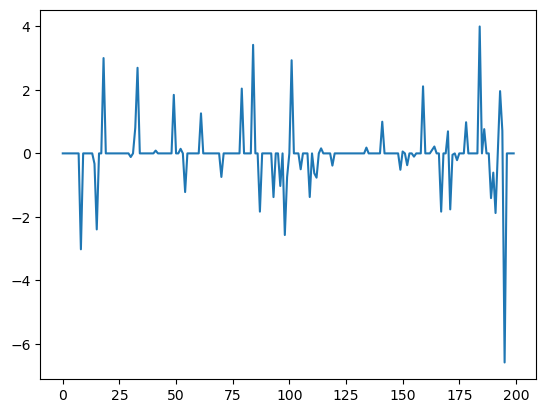

In [29]:
plt.plot(log_L1.coef_.flatten())

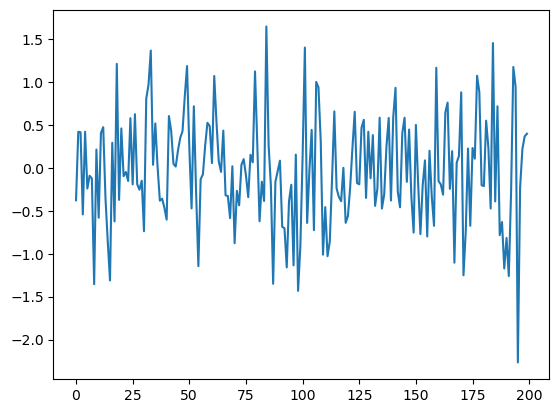

In [30]:
plt.plot(log_L2.coef_.flatten())

#### GridSearchCV on Logistic Regression

In [31]:
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=60)
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              "penalty": ['l2'],
              "solver":['lbfgs', 'sag', 'saga', 'newton-cg']}

model_lr = LogisticRegression(max_iter=1000)
lr_grid = GridSearchCV(model_lr, param_grid, cv=kf, error_score='raise')
lr_grid.fit(X_train, y_train)
print(lr_grid.best_score_)
print(lr_grid.best_params_)

0.7629295532646048
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [32]:
test_score = lr_grid.score(X_test, y_test)
print(test_score)

0.743801652892562


### Ranking Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report

def rc(SEED):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= SEED)

    
    log_reg = LogisticRegression(random_state=SEED) 
    knn = KNN()
    dt = DecisionTreeClassifier(random_state=SEED)
    
    classifiers = [('Logistic Regression', log_reg), 
               ('K Nearest Neighbours', knn),
               ('DecisionTreeClassifier', dt)]

    for clf_name, clf in classifiers: 
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        print('{:s} : {:.2f}'.format(clf_name, accuracy_score(y_test, y_pred)))
        print(classification_report(y_test, y_pred))

In [34]:
rc(60)

Logistic Regression : 0.78
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        52
           1       0.88      0.71      0.78        69

    accuracy                           0.78       121
   macro avg       0.78      0.79      0.78       121
weighted avg       0.80      0.78      0.78       121

K Nearest Neighbours : 0.74
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        52
           1       0.81      0.70      0.75        69

    accuracy                           0.74       121
   macro avg       0.74      0.74      0.73       121
weighted avg       0.75      0.74      0.74       121

DecisionTreeClassifier : 0.71
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        52
           1       0.74      0.75      0.75        69

    accuracy                           0.71       121
   macro avg       0.70      0.70      0.70

Les résultats indique que parmi les trois classifieurs, la précision la plus haute est obtenue par Logistic Regression, soit 0.78.

### Build new features from text

#### Tokenization with spaCy and count the number tokens in each reviews

In [35]:
import spacy 
nlp = spacy.load("en_core_web_sm")

In [36]:
def nb_tokens(list_text):
    """
    :return : length of tokens in each text -> list [123, 121, 274...]
    """
    len_tokens = []

    for i in range(len(list_text)):
        token_list = [token.text for token in list_text[i]]

        for length in [len(token_list)]:
            len_tokens.append(str(length))

    return len_tokens

text_list = [nlp(item) for item in imdb.text]
length = nb_tokens(text_list)

In [37]:
imdb['nb_tokens'] = length
imdb.head()

,docid,text,label,nb_tokens
0,0_3,Story of a man who has unnatural feelings for ...,0,123
1,100_3,OK its not the best film I've ever seen but at...,0,121
2,101_1,"Amateur, no budget films can be surprisingly g...",0,274
3,102_1,My girlfriend once brought around The Zombie C...,0,215
4,103_1,"Without wishing to be a killjoy, Brad Sykes is...",0,124


#### Find the 10 most frequent words in positives and negatives reviews

In [38]:
from collections import Counter

In [39]:
def neg_adj_freq(text_neg):

    """
    :return 
    """
    text_list = [nlp(item) for item in text_neg]
    neg_adj_list = []
    
    for i in range(len(text_list)):
        token_list = [token.text for token in text_list[i] if token.pos_ == 'ADJ']

        for adj in token_list:
            neg_adj_list.append(adj)
    
    count_adj = Counter(neg_adj_list)
    return count_adj.most_common(10)

neg_text = imdb[imdb['label'] == 0]['text']
neg_freq = neg_adj_freq(neg_text)
print(neg_freq)

[('good', 165), ('bad', 151), ('other', 90), ('more', 89), ('first', 73), ('many', 69), ('great', 63), ('little', 61), ('better', 60), ('same', 60)]


In [40]:
def pos_adj_freq(text_pos):
    
    
    text_list = [nlp(item) for item in text_pos]
    pos_adj_list = []

    for i in range(len(text_list)):
        token_list = [token.text for token in text_list[i] if token.pos_ == 'ADJ']

        for adj in token_list:
            pos_adj_list.append(adj)

    count_adj = Counter(pos_adj_list)
    return count_adj.most_common(10)

pos_text = imdb[imdb['label'] == 1]['text']
pos_freq = pos_adj_freq(pos_text)
print(pos_freq)

[('good', 188), ('great', 139), ('other', 119), ('more', 116), ('first', 90), ('best', 81), ('many', 78), ('little', 71), ('old', 57), ('real', 54)]


> Résumé :  
> Il n'est pas très pertinent de trouver la fréquence d'un seul mot, puisque dans tous les texts négatifs, on a aussi obtenu le mot `good`, `great` et `better` que ceux affichés généralement souvent dans le contexte positive. 

#### Identifying and count the number of named entities

In [41]:
def ent_pos(test_pos):

    en_pos_dict = {}
    values_cnt={}

    text_list = [item for item in pos_text]
    
    for doc in nlp.pipe(text_list,disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"]):
        pos_ent = [(ent.text, ent.label_) for ent in doc.ents]

        for content, label in pos_ent:
            en_pos_dict[content] = label
    # print(en_neg_dict) -> {'Teachers': 'WORK_OF_ART', 'My 35 years': 'DATE', "Bromwell High's": 'ORG'...}

    for key, val in en_pos_dict.items():
        values_cnt[val] = values_cnt.get(val,0)+1

    print(values_cnt)


pos_text = imdb[imdb['label'] == 1]['text']
pos_ent = ent_pos(pos_text)

{'WORK_OF_ART': 102, 'DATE': 202, 'ORG': 298, 'PERSON': 675, 'TIME': 38, 'ORDINAL': 13, 'GPE': 119, 'LOC': 19, 'CARDINAL': 69, 'FAC': 21, 'NORP': 58, 'MONEY': 8, 'EVENT': 13, 'PRODUCT': 23, 'PERCENT': 1, 'LANGUAGE': 4, 'LAW': 3, 'QUANTITY': 1}


In [42]:
def ent_neg(test_neg):

    en_neg_dict = {}
    values_cnt={}

    text_list = [item for item in neg_text]
    
    for doc in nlp.pipe(text_list,disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"]):
        neg_ent = [(ent.text, ent.label_) for ent in doc.ents]

        for content, label in neg_ent:
            en_neg_dict[content] = label
    # print(en_neg_dict) -> {'Shakespeare': 'PERSON', 'third': 'ORDINAL', 'Vilmos Zsigmond': 'PERSON'...}

    for key, val in en_neg_dict.items():
        values_cnt[val]=values_cnt.get(val,0)+1
        
    print(values_cnt)


neg_text = imdb[imdb['label'] == 0]['text']
neg_ent = ent_neg(neg_text)

{'PERSON': 619, 'ORDINAL': 12, 'ORG': 273, 'PRODUCT': 15, 'CARDINAL': 85, 'WORK_OF_ART': 137, 'NORP': 71, 'MONEY': 13, 'FAC': 15, 'TIME': 85, 'GPE': 135, 'DATE': 190, 'PERCENT': 9, 'EVENT': 9, 'QUANTITY': 8, 'LOC': 31, 'LAW': 6}
